In [2]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

In [3]:
dados = pd.read_csv('train.csv')

In [4]:
dados.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train, y_train = dados.drop(['label'], axis=1).values, dados['label'].values

In [10]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
X_train.shape

(42000, 784)

In [13]:
y_train.shape

(42000,)

In [19]:
numero_qualquer = X_train[20]

In [26]:
img_numero_qualquer = numero_qualquer.reshape(28,28)

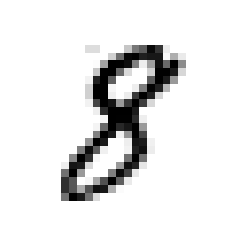

In [27]:
plt.imshow(img_numero_qualquer, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [22]:
y_train[20]

8

In [34]:
index_misturados = np.random.permutation(42000)

In [36]:
X_train, y_train = X_train[index_misturados], y_train[index_misturados]

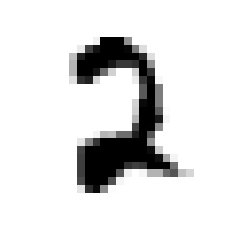

In [38]:
numero_qualquer = X_train[20]
img_numero_qualquer = numero_qualquer.reshape(28,28)
plt.imshow(img_numero_qualquer, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [39]:
input_test = pd.read_csv('test.csv')
target= pd.read_csv('sample_submission.csv')

In [40]:
X_test = input_test.values
y_test = target['Label'].values

In [41]:
target['Label'].value_counts()

0    28000
Name: Label, dtype: int64

In [42]:
y_train_0 = (y_train==0)
y_test_0 = (y_test==0)

In [45]:
modelo = SGDClassifier(random_state=42)
modelo.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [47]:
modelo.predict(X_test[0].reshape(1,-1))

array([False])

In [58]:
cross_val_score(modelo, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9805    , 0.98821429, 0.98564286])

In [56]:
class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [57]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9035    , 0.89757143, 0.90378571])

In [60]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(modelo, X_train, y_train_0, cv=3)

In [61]:
confusion_matrix(y_train_0, y_train_pred)

array([[37577,   291],
       [  348,  3784]], dtype=int64)

In [62]:
precision_score(y_train_0, y_train_pred)

0.9285889570552147

In [63]:
recall_score(y_train_0, y_train_pred)

0.9157792836398838

In [74]:
f1_score(y_train_0, y_train_pred)

0.9221396368953333

In [75]:
y_scores = modelo.decision_function(X_test[0].reshape(1,-1))
y_scores

array([-35095.56529919])

In [76]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [77]:
threshold = -40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [78]:
y_scores = cross_val_predict(modelo, X_train, y_train_0, cv=3,
method="decision_function")

In [79]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

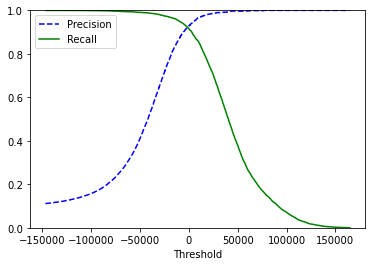

In [80]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [83]:
y_train_pred_100 = (y_scores > 100000)

In [84]:
precision_score(y_train_0, y_train_pred_100)

1.0

In [85]:
recall_score(y_train_0, y_train_pred_100)

0.07139399806389157

In [86]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

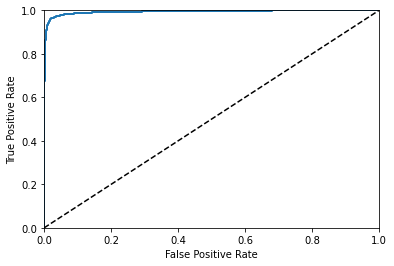

In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [88]:
roc_auc_score(y_train_0, y_scores)

0.9937857134238453

In [89]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method="predict_proba")

In [90]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

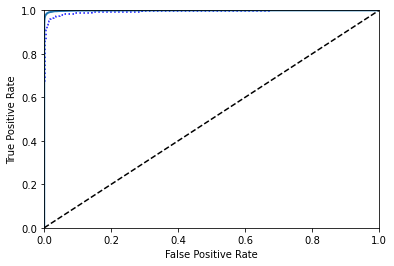

In [92]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

In [93]:
roc_auc_score(y_train_0, y_scores_forest)

0.9993214506988203